# Exercises Sheet 4 Search - Genetic Algorithms

In [47]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

#random.seed(2)

class Game:
    def __init__(self, str_size):
        if str_size <= 0:
            raise ValueError("str_size must be a positive integer")
        self.str_size = str_size
        self.target_pattern = [random.choice((0,1)) for x in range(0,self.str_size)]

    def change_game_pattern(self):
        self.target_pattern = [random.choice((0,1)) for x in range(0,self.str_size)]

    def generate_random_bit_pattern(self):
        return [random.choice((0,1)) for x in range(0,self.str_size)]

    def is_correct_pattern(self, pattern):
        if len(pattern) != self.str_size:
            raise ValueError("Pattern size does not match the expected size")
        return pattern == self.target_pattern

    def calc_fitness(self, atual):
        if len(atual) != self.str_size:
            raise ValueError("Pattern size does not match the expected size")
        matches = sum(1 for i in range(len(self.target_pattern)) if self.target_pattern[i] == atual[i])
        return matches / self.str_size  # Normalized score


    def mutate_pattern(self, pattern):
        if len(pattern) != self.str_size:
            print(pattern)
            print(self.target_pattern)
            raise ValueError("Pattern size does not match the expected size")

        position = random.randint(0, self.str_size - 1) # random position
        pattern[position] = 1 if pattern[position] == 0 else 0

        return pattern

def measure_performance_random_picks(str_size, num_trials=30):
    attempts = []
    times = []
    fitness_lista = []
    padrao_lista = []

    for nada in range(num_trials):
        game = Game(str_size)
        start_time = time.time()
        attempt_count = 0

        while True:
            pattern = game.generate_random_bit_pattern()
            fitness = game.calc_fitness(pattern)
            fitness_lista.append(fitness)
            attempt_count += 1
            if game.is_correct_pattern(pattern):
                break

        #print(fitness_lista)
        end_time = time.time()
        elapsed_time = end_time - start_time
        attempts.append(attempt_count)
        times.append(elapsed_time)

    return attempts, times

def only_better_fittness(str_size, max_iterations=1000): # Ex1 b)
    game = Game(str_size)
    current_pattern = game.generate_random_bit_pattern()
    print(f"Initial Pattern: {current_pattern}, Wanted Pattern: {game.target_pattern}")
    current_fitness = game.calc_fitness(current_pattern)
    iterations = 0

    for iteration in range(max_iterations):
        mutated_pattern = game.mutate_pattern(current_pattern)
        mutated_fitness = game.calc_fitness(mutated_pattern)

        if mutated_fitness > current_fitness:
            current_pattern = mutated_pattern
            current_fitness = mutated_fitness

        if game.is_correct_pattern(current_pattern):
            break
        iterations+=1

    print("Final Pattern:", current_pattern)
    print("Iterations:", iterations)

    return current_pattern, iteration + 1

def measure_performance_only_better_picks(str_size, num_trials=30):
    attempts = []
    times = []

    for _ in range(num_trials):
        game = Game(str_size)
        current_pattern = game.generate_random_bit_pattern()
        current_fitness = game.calc_fitness(current_pattern)
        attempt_count = 0
        start_time = time.time()

        while True:
            mutated_pattern = game.mutate_pattern(current_pattern)
            mutated_fitness = game.calc_fitness(mutated_pattern)
            attempt_count += 1

            # Accept only if the fitness improves
            if mutated_fitness > current_fitness:
                current_pattern = mutated_pattern
                current_fitness = mutated_fitness

            if game.is_correct_pattern(current_pattern):
                break

        end_time = time.time()
        elapsed_time = end_time - start_time
        attempts.append(attempt_count)
        times.append(elapsed_time)

    return attempts, times

# Ex 1.2
def measure_performance_mutate_evolution(str_size, num_trials=30):
    attempts_list = []  # Store the number of attempts for each trial
    times_list = []  # Store the elapsed time for each trial

    for _ in range(num_trials):
        inicio = time.time()
        game = Game(str_size)  # Use the provided str_size
        solucao = game.generate_random_bit_pattern()
        top30 = [[]]

        # Initialize the population
        for i in range(0, 100):
            numero = game.generate_random_bit_pattern()
            top30.append((numero, game.calc_fitness(numero)))

        top30.pop(0)
        top30.sort(key=lambda x: x[1], reverse=True)

        iteracoes = 0  # Track the number of iterations

        # Evolution loop
        #while top30[0][1] != 1 or top30[0][1] != top30[1][1]:
        #while top30[0][1] != 1 or top30[0][1] != top30[1][1]:
        #while top30[0][1] != 1 or top30[1][1] != 1:
        while not (top30[0][1]==1 and top30[0][1] == top30[1][1]):
            iteracoes += 1
            top30 = top30[0:30]

            for i in range(0, 70):
                numero = game.mutate_pattern(top30[random.randint(0, 29)][0])
                top30.append((numero, game.calc_fitness(numero)))

            top30.sort(key=lambda x: x[1], reverse=True)

        fim = time.time()
        elapsed_time = fim - inicio

        attempts_list.append(iteracoes)  # Record the number of iterations
        times_list.append(elapsed_time)  # Record the elapsed time

    print(top30)

    return attempts_list, times_list

# Ex 1.3
def measure_performance_crossover(str_size, num_trials=30):
    attempts_list = []  # Store the number of attempts for each trial
    times_list = []  # Store the elapsed time for each trial

    for _ in range(num_trials):
        inicio = time.time()
        game = Game(str_size)
        solucao = game.generate_random_bit_pattern()
        top30 = [[]]

        # Initialize the population
        for i in range(0, 100):
            numero = game.generate_random_bit_pattern()
            top30.append((numero, game.calc_fitness(numero)))

        top30.pop(0)
        top30.sort(key=lambda x: x[1], reverse=True)

        iteracoes = 0  # Track the number of iterations

        # Evolution loop with crossover
        while top30[0][1] != 1 or top30[0][1] != top30[1][1]:
            iteracoes += 1
            top30 = top30[0:30]

            for i in range(0, 70):
                # Perform crossover
                parent1 = top30[random.randint(0, 29)][0]
                parent2 = top30[random.randint(0, 29)][0]
                division = random.randint(2, str_size - 3)
                offspring = parent1[0:division] + parent2[division:]

                top30.append((offspring, game.calc_fitness(offspring)))

            top30.sort(key=lambda x: x[1], reverse=True)

        fim = time.time()
        elapsed_time = fim - inicio

        print(top30)

        attempts_list.append(iteracoes)  # Record the number of iterations
        times_list.append(elapsed_time)  # Record the elapsed time

    return attempts_list, times_list


def plot_performance(str_sizes, num_trials, performance_func):

    attempts_data = []
    times_data = []

    for str_size in str_sizes:
        attempts, times = performance_func(str_size, num_trials=30)
        attempts_data.append(attempts)
        times_data.append(times)

    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # Plot attempts
    axs[0].boxplot(attempts_data, positions=str_sizes, widths=0.6)
    axs[0].set_xlabel('Number of Bits')
    axs[0].set_ylabel('Number of Attempts')
    axs[0].set_title('Attempts vs Number of Bits')
    axs[0].set_xticks(str_sizes)

    # Plot times
    axs[1].boxplot(times_data, positions=str_sizes, widths=0.6)
    axs[1].set_xlabel('Number of Bits')
    axs[1].set_ylabel('Time (seconds)')
    axs[1].set_title('Time vs Number of Bits')
    axs[1].set_xticks(str_sizes)

    plt.tight_layout()

'''random.seed(2)
game = Game(16)
solucao = game.generate_random_bit_pattern()
top30 = [[]]
fitness = []

for i in range(0,100):
    numero = game.generate_random_bit_pattern()
    top30.append((numero,game.calc_fitness(numero)))

top30.pop(0)
top30.sort(key=lambda x: x[1], reverse=True)

top30 = top30[0:30]    

for i in range(0,70):
    numero = game.mutate_pattern(top30[random.randint(0,29)][0])
    top30.append((numero,game.calc_fitness(numero)))

print(top30)'''

'random.seed(2)\ngame = Game(16)\nsolucao = game.generate_random_bit_pattern()\ntop30 = [[]]\nfitness = []\n\nfor i in range(0,100):\n    numero = game.generate_random_bit_pattern()\n    top30.append((numero,game.calc_fitness(numero)))\n\ntop30.pop(0)\ntop30.sort(key=lambda x: x[1], reverse=True)\n\ntop30 = top30[0:30]    \n\nfor i in range(0,70):\n    numero = game.mutate_pattern(top30[random.randint(0,29)][0])\n    top30.append((numero,game.calc_fitness(numero)))\n\nprint(top30)'

(num_attempts, time) for str_size=4: ([1], [2.9087066650390625e-05])
(num_attempts, time) for str_size=6: ([3], [7.677078247070312e-05])
(num_attempts, time) for str_size=8: ([15], [0.0002663135528564453])
Initial Pattern: [1, 0], Wanted Pattern: [1, 0]
Final Pattern: [1, 0]
Iterations: 1
Initial Pattern: [1, 0, 1, 1], Wanted Pattern: [0, 1, 0, 1]
Final Pattern: [0, 1, 0, 1]
Iterations: 4
Initial Pattern: [1, 1, 0, 1, 0], Wanted Pattern: [1, 1, 1, 1, 0]
Final Pattern: [1, 1, 1, 1, 0]
Iterations: 6
Initial Pattern: [1, 0, 1, 0, 1, 1], Wanted Pattern: [1, 0, 0, 0, 1, 1]
Final Pattern: [1, 0, 0, 0, 1, 1]
Iterations: 76
Initial Pattern: [1, 0, 0, 1, 0, 0, 0], Wanted Pattern: [1, 1, 0, 1, 1, 1, 1]
Final Pattern: [1, 1, 0, 1, 1, 1, 1]
Iterations: 39
Initial Pattern: [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], Wanted Pattern: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Final Pattern: [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
Iterations: 1000
Initial Pattern: [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], Wanted P

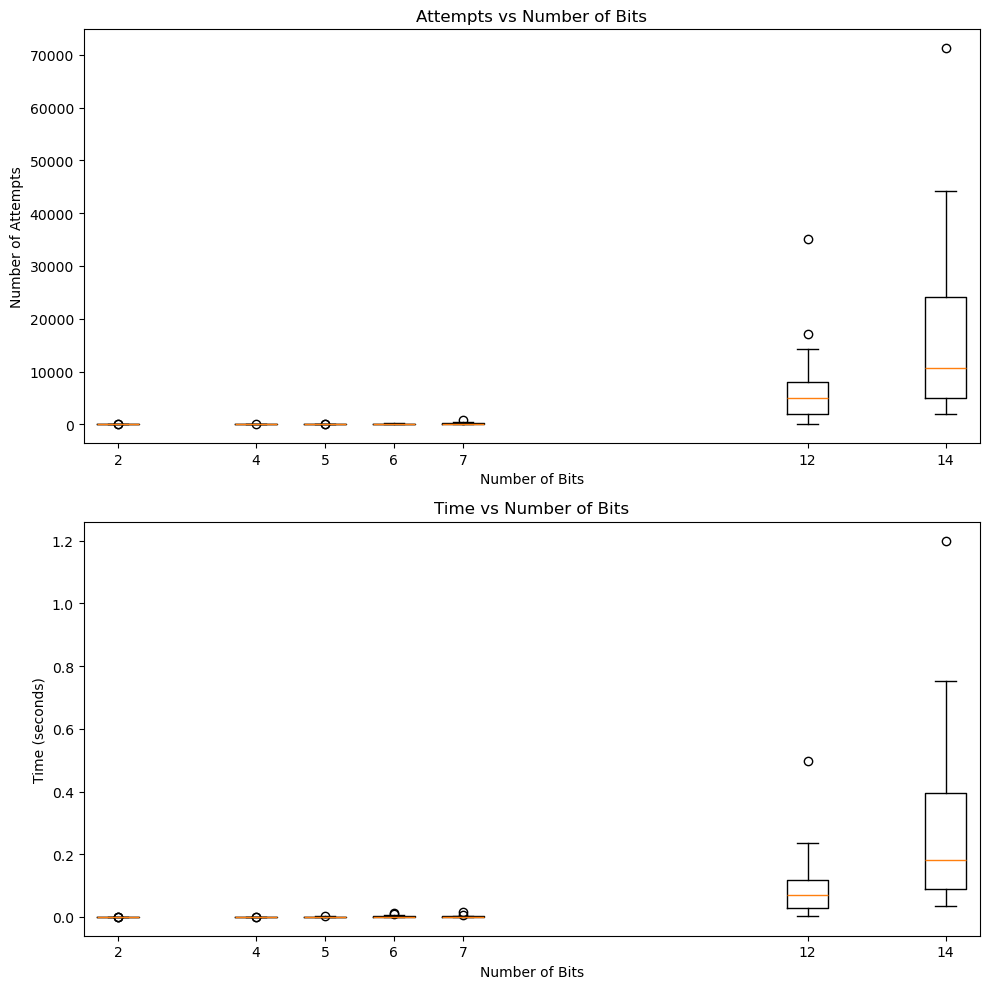

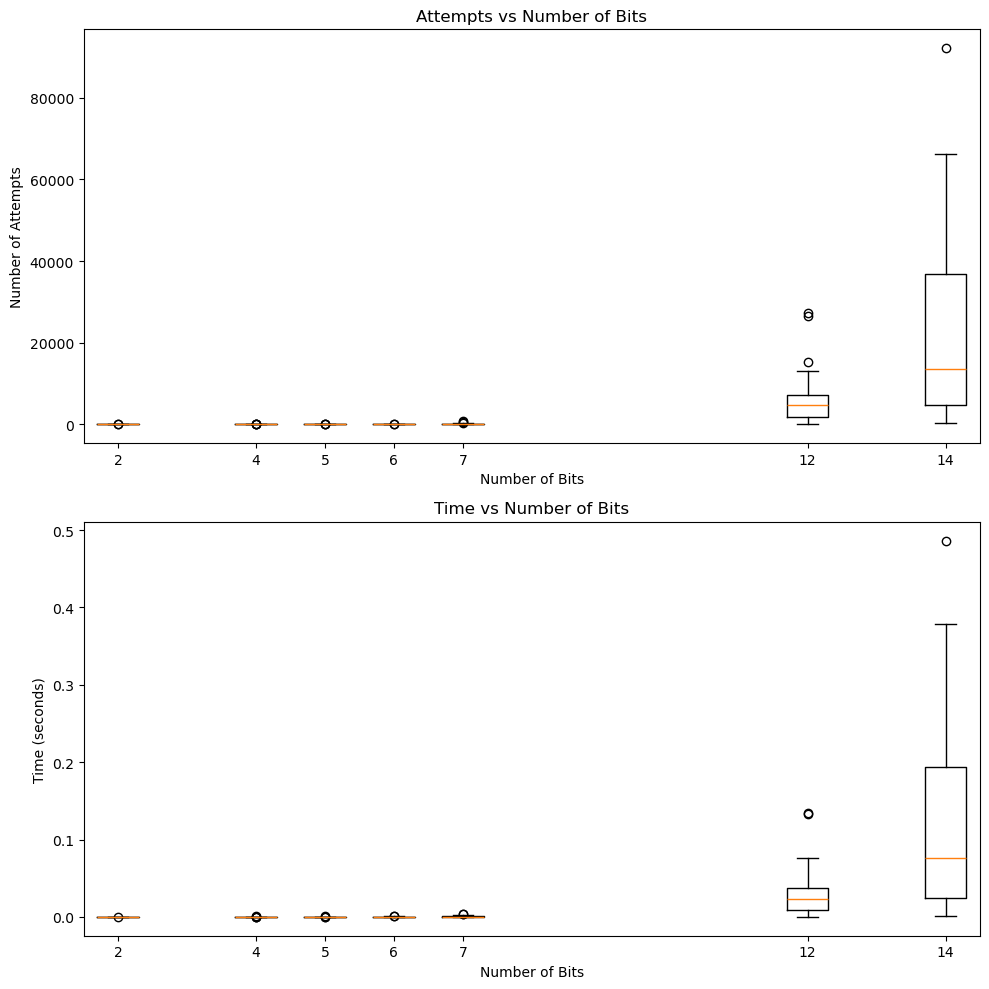

In [48]:
myGame = Game(6)
#myPattern = myGame.generate_random_bit_pattern()
#print(myPattern)
#print(myGame.mutate_pattern(myPattern))

print(f"(num_attempts, time) for str_size=4: {measure_performance_random_picks(str_size=4, num_trials=1)}")
print(f"(num_attempts, time) for str_size=6: {measure_performance_random_picks(str_size=6, num_trials=1)}")
print(f"(num_attempts, time) for str_size=8: {measure_performance_random_picks(str_size=8, num_trials=1)}")

str_sizes = [2, 4, 5, 6, 7, 12, 14] # for tests

# Ex 1 b)
for x in str_sizes:
    only_better_fittness(x)

# Define the pattern sizes to test#
# Plot the performance
print("Plot Performance for the random picks function:")
plot_performance(str_sizes, num_trials=30, performance_func=measure_performance_random_picks)

print("Plot Performance for accepting only better mutations function:")
plot_performance(str_sizes, num_trials=30, performance_func=measure_performance_only_better_picks) # Ex 1 b)


Plot Performance for using generations and mutating them function:
[([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 0], 1.0), ([0, 1], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([

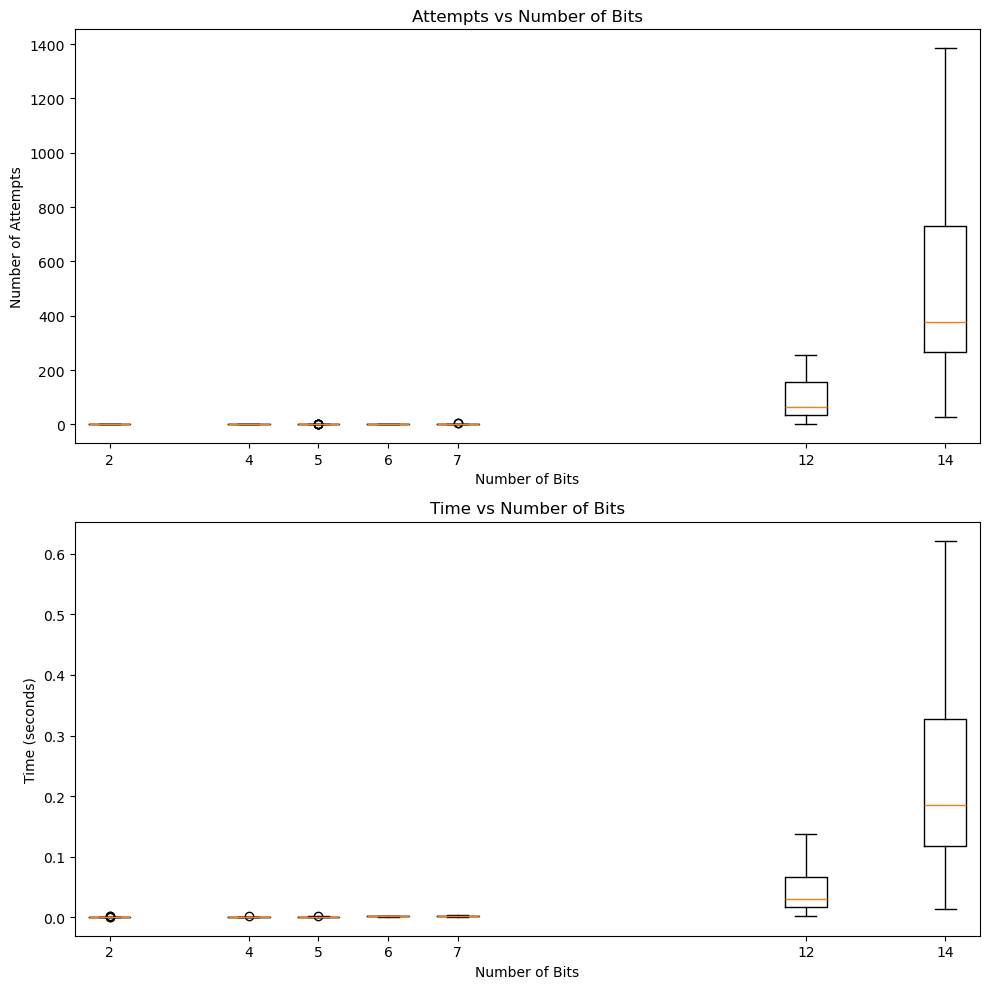

In [49]:
print("Plot Performance for using generations and mutating them function:")
plot_performance(str_sizes, num_trials=30, performance_func=measure_performance_mutate_evolution) # Ex 1.2

Plot Performance for using generations and crossing the best ones function:
[([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([1, 1], 1.0), ([0, 1], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([0, 1], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([1, 0], 0.5), ([0, 1],

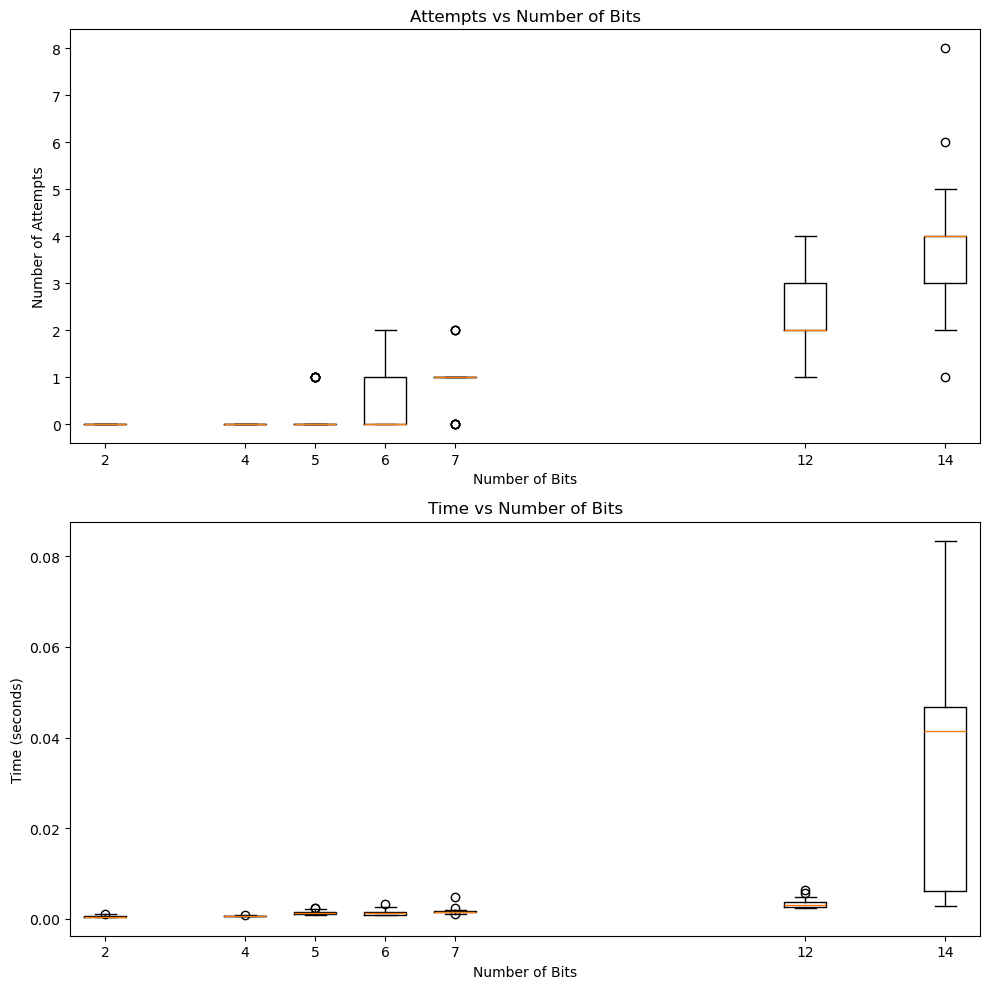

In [50]:
print("Plot Performance for using generations and crossing the best ones function:") 
plot_performance(str_sizes, num_trials=30, performance_func=measure_performance_crossover) # Ex 1.3

In [51]:
import random
import numpy as np
import matplotlib.pyplot as plt

class GameEx2:
    def __init__(self):
        self.str_size = random.randint(0, 1000)
        
        self.target_pattern = self.generate_random_bit_pattern()
        
        print(f"init random string size: {self.str_size}")

    def generate_random_bit_pattern(self):
        return ''.join(str(random.choice((0,1))) for _ in range(random.randint(0, 1000)))

    def is_correct_pattern(self, pattern):
        return pattern == self.target_pattern

    def calc_fitness(self, atual):
        # Determine the length to compare (minimum of both lengths)
        compare_length = min(len(atual), len(self.target_pattern))
        
        # Count matching bits in the common part
        matches = sum(a == b for a, b in zip(atual[:compare_length], self.target_pattern[:compare_length]))
        
        # Penalize for length differences
        length_penalty = abs(len(atual) - len(self.target_pattern))
        
        # Calculate fitness
        # Normalize by the target pattern length, subtract length penalty
        fitness = (matches / len(self.target_pattern)) - (length_penalty / len(self.target_pattern))
        
        return max(0, fitness)  # Ensure non-negative fitness

    def mutate_pattern(self, pattern):
        # Convert string to list for mutation
        pattern_list = list(pattern)
        
        # Randomly choose to add, remove, or flip a bit
        mutation_type = random.choice(['flip', 'add', 'remove'])
        
        if mutation_type == 'flip':
            # Randomly choose a position to flip if pattern is not empty
            if pattern_list:
                position = random.randint(0, len(pattern_list) - 1)
                pattern_list[position] = '0' if pattern_list[position] == '1' else '1'
        
        elif mutation_type == 'add':
            # Add a random bit at a random position
            position = random.randint(0, len(pattern_list))
            pattern_list.insert(position, str(random.choice((0,1))))
        
        elif mutation_type == 'remove':
            # Remove a bit if pattern is not empty
            if pattern_list:
                position = random.randint(0, len(pattern_list) - 1)
                del pattern_list[position]
        
        return ''.join(pattern_list)

    def cruzamento(self, solucao1, solucao2=None):
        if solucao2 is None:
            solucao2 = self.generate_random_bit_pattern()

        # Randomly choose crossover point based on the shorter string's length
        crossover_point = random.randint(1, min(len(solucao1), len(solucao2)) - 1)

        # Create offspring by combining parts of both parents
        filho1 = solucao1[:crossover_point] + solucao2[crossover_point:]
        filho2 = solucao2[:crossover_point] + solucao1[crossover_point:]

        # Randomly return one of the offspring
        return random.choice([filho1, filho2])


# Demonstrate the flexible genetic algorithm
g = GameEx2()  # Random string size

print("Target Pattern:", g.target_pattern)

# Generate initial random pattern
teste = g.generate_random_bit_pattern()
print("Initial Pattern:", teste)

# Mutation example
mutated = g.mutate_pattern(teste)
print("Mutated Pattern:", mutated)

# Fitness calculation
print(f"Initial Fitness: {g.calc_fitness(teste)}")
print(f"Mutated Fitness: {g.calc_fitness(mutated)}")

# Crossover example
second_pattern = g.generate_random_bit_pattern()
crossed_pattern = g.cruzamento(teste, second_pattern)
print("Crossover Result:", crossed_pattern)
print(f"Crossover Fitness: {g.calc_fitness(crossed_pattern)}")

init random string size: 32
Target Pattern: 011101001111001011101000101111101000110111101010110101011101001101011000000000001011100111010010101101101010111011011010100000100101111111110100111110001111101010110011110101000001001100011000110001101011101100010000110110001101010000100110001111000110111011101110000101100101111100000001010100100111000001110011100101010000001110001000111000101100010101000001100010110100000001100000011001100100110010001111100110000110100101100100111111011000100001011111101000010000010100000110
Initial Pattern: 1000011101101011111010010001110000110110101101110101100000
Mutated Pattern: 10000111101101011111010010001110000110110101101110101100000
Initial Fitness: 0
Mutated Fitness: 0
Crossover Result: 10001101001010001111100001100101011001000010101010110101111110011100000110101110000110101010011110001010101100000000100000101100100001110110000111110100001000000011110011000100001100110111011011100110011010110101001101101111011111100010101011110011010101101001010011

In [52]:
# ex 3

import numpy as np
import random
import matplotlib.pyplot as plt
import time

#random.seed(2)

class Game:
    def __init__(self, str_size):
        if str_size <= 0:
            raise ValueError("str_size must be a positive integer")
        self.str_size = str_size
        self.target_pattern = random.randint(10**(str_size-1),(10**str_size)-1)
        print("target: "+str(self.target_pattern))

    def generate_random_bit_pattern(self):
        return random.randint(10**(self.str_size-1),(10**self.str_size)-1)

    def is_correct_pattern(self, pattern):
        if len(str(pattern)) != self.str_size:
            raise ValueError("Pattern size does not match the expected size")
        return pattern == self.target_pattern

    def calc_fitness(self, atual): # ola // 10**2 % 10
        if len(str(atual)) != self.str_size:
            raise ValueError("Pattern size does not match the expected size")
        valor = 0
        for i in range(0,len(str(self.target_pattern))):
            if (self.target_pattern //10**i % 10) == (atual // 10**i%10):
                valor += 1/len(str(self.target_pattern))
        
        return valor

    def mutate_pattern(self, pattern):
        if len(str(pattern)) != self.str_size:
            print(pattern)
            print(self.target_pattern)
            raise ValueError("Pattern size does not match the expected size")

        position = random.randint(0, self.str_size - 1)
        final = 0
        for i in range(0,len(str(self.target_pattern))):
            if i == position:
                final += (10**i) * random.randint(1,9)
            else:
                final += (10**i) * (pattern//10**i % 10)

        return final

    def cruzamento(self, solucao):
        if len(str(solucao)) != self.str_size:
            print(solucao)
            print(self.target_pattern)
            raise ValueError("Pattern size does not match the expected size")

        c1 = self.generate_random_bit_pattern()
        c2 = self.generate_random_bit_pattern()

        divisao = random.randint(2,len(str(solucao))-3)
        p1 = 0
        p2 = 0

        for i in range(0,len(str(c1))):
            if i >= divisao: # parte 2
                p2 += (10**i) * (c2 //10**i % 10)
            else: # parte 1
                p1 += (10**i) * (c1 //10**i % 10)
        
        print(f"Primeiro a cruzar: {c1}")
        print(f"Segundo a cruzar: {c2}")
        return p1 + p2

g = Game(16)
teste = g.generate_random_bit_pattern()
print("teste:  "+str(teste))
print("mutacao "+str(g.mutate_pattern(teste)))
print(f"Is_correct_pattern: {g.is_correct_pattern(teste)}")
print(f"fitness: {g.calc_fitness(teste)}")
print("Cruzamento:")
print(f"resultado do cruzamento: {g.cruzamento(teste)}")

target: 6047470489316559
teste:  7843693980507452
mutacao 7843693980507492
Is_correct_pattern: False
fitness: 0.1875
Cruzamento:
Primeiro a cruzar: 4718372352680474
Segundo a cruzar: 5696281472348567
resultado do cruzamento: 5696281472380474


# Ex 4

Para o problema do robô no labirinto teríamos que utilizar um método diferente para ser possível resolver com algorítmos evolucionários. 
As soluções para o problema poderiam ser uma string de movimentos $\boxed{U}\boxed{D}\boxed{L}\boxed{D}\boxed{D}\boxed{D}$... representaria a solução "Up", "Down", "Left", "Down", "Down", "Down", etc. 
Desta forma é possível fazer mutações, alterando um dos movimentos. É possível também fazer crossings, misturando uma porção de movimentos de uma solução com uma porção de outra solução. E para calcular o fitness de cada solução utilizava-se a *Manhattan distance* que nos dá a distância do objetivo num ambiente de grelha e o número de passos que foram precisos para chegar lá.
Teriamos também que acomodar no nosso algorítmo soluções maiores e menores e ter uma forma de variar o tamanho para que não fossem excessivamente grandes quando não precisam de ser nem pequenas ao ponto de não deixar o agente chegar a lado nenhum.